### Evidencia 2 - Punto 5

In [1]:
import numpy as np
import random
import operator
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# carga del dataset
df = pd.read_csv('7_maravillas_mundo_2007.csv')

In [3]:
from math import acos, cos, sin, radians, atan2, sqrt

class Ciudad:
    def __init__(self, x, y, name):
        self.R = 6371000  # radio de la tierra en metros
        self.long = x
        self.lat = y
        self.name = name
        self.convert_radiands()
        
    def convert_radiands(self):
        self.long_rad = radians(self.long)
        self.lat_rad = radians(self.lat)

    # calcula la distancia usando la funcion del semiverseno
    def distancia(self, ciudad):
        dif_lat = self.lat_rad - ciudad.lat_rad
        dif_lon = self.long_rad - ciudad.long_rad
        
        a = sin(dif_lat/2) ** 2 + cos(ciudad.lat_rad) * cos(self.lat_rad) * sin(dif_lon/2) ** 2
        c = 2 * atan2(sqrt(a), sqrt(1-a))
        d = self.R * c
        
        return d
    
    def __repr__(self):
        return f"(City: {self.name} - Latitud: {str(self.lat)} - Longitud: {str(self.long)})"

In [4]:
df

,CIUDAD,LATITUD,LONGITUD
0,"Gran muralla china, China",40.431909,116.570370
1,"Ciudad de Petra, Jordania",30.328493,35.444364
2,"Cristo Redentor, Brasil",-22.951847,-43.210486
3,"Machu Picchu, Peru",-13.163087,-72.544974
4,"Templo de Kukulcan, Mexico",20.683136,-88.568724
5,"Coliseo, Italia",41.890346,12.492263
6,"Taj Mahal, India",27.175393,78.042164


In [5]:
listaCiudades = []

for i in range(0,len(df)):
    listaCiudades.append(Ciudad(x=df.LONGITUD[i], y=df.LATITUD[i], name=df.CIUDAD[i]))


listaCiudades[0:5]

[(City: Gran muralla china, China - Latitud: 40.43190867 - Longitud: 116.5703696),
 (City: Ciudad de Petra, Jordania - Latitud: 30.32849342 - Longitud: 35.44436426),
 (City: Cristo Redentor, Brasil - Latitud: -22.95184683 - Longitud: -43.21048607),
 (City: Machu Picchu, Peru - Latitud: -13.16308725 - Longitud: -72.54497405),
 (City: Templo de Kukulcan, Mexico - Latitud: 20.68313645 - Longitud: -88.5687242)]

In [6]:
class Aptitud:
    def __init__(self, ruta):
        self.ruta = ruta
        self.distancia = 0
        self.aptitud= 0.0
    
    # calcula la menor ruta
    def distanciaRuta(self):
        if self.distancia ==0:
            distanciaRelativa = 0
            for i in range(0, len(self.ruta)):
                puntoInicial = self.ruta[i]
                puntoFinal = None
                if i + 1 < len(self.ruta):
                    puntoFinal = self.ruta[i + 1]
                else:
                    puntoFinal = self.ruta[0]
                distanciaRelativa += puntoInicial.distancia(puntoFinal)
            self.distancia = distanciaRelativa
        return self.distancia
    
    def rutaApta(self):
        if self.aptitud == 0:
            self.aptitud = 1 / float(self.distanciaRuta())
        return self.aptitud

In [7]:
def crearRuta(listaCiudades):
    route = random.sample(listaCiudades, len(listaCiudades))
    return route

In [8]:
# paso de inicializacion de la poblacion
def poblacionInicial(tamanoPob,listaCiudades):
    poblacion = []

    for i in range(0, tamanoPob):
        poblacion.append(crearRuta(listaCiudades))
    return poblacion

In [9]:
# se clasifica la ruta
def clasificacionRutas(poblacion):
    fitnessResults = {}
    for i in range(0,len(poblacion)):
        fitnessResults[i] = Aptitud(poblacion[i]).rutaApta()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

In [10]:
# paso de seleccion
def seleccionRutas(popRanked, indivSelecionados):
    resultadosSeleccion = []
    df = pd.DataFrame(np.array(popRanked), columns=["Indice","Aptitud"])
    df['cum_sum'] = df.Aptitud.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Aptitud.sum()
    
    for i in range(0, indivSelecionados):
        resultadosSeleccion.append(popRanked[i][0])
    for i in range(0, len(popRanked) - indivSelecionados):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                resultadosSeleccion.append(popRanked[i][0])
                break
    return resultadosSeleccion

In [11]:
def grupoApareamiento(poblacion, resultadosSeleccion):
    grupoApareamiento = []
    for i in range(0, len(resultadosSeleccion)):
        index = resultadosSeleccion[i]
        grupoApareamiento.append(poblacion[index])
    return grupoApareamiento

In [12]:
# genera rutas nuevas
def reproduccion(progenitor1, progenitor2):
    hijo = []
    hijoP1 = []
    hijoP2 = []
    
    geneA = int(random.random() * len(progenitor1))
    geneB = int(random.random() * len(progenitor2))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        hijoP1.append(progenitor1[i])
        
    hijoP2 = [item for item in progenitor2 if item not in hijoP1]

    hijo = hijoP1 + hijoP2
    return hijo

In [13]:
def reproduccionPoblacion(grupoApareamiento, indivSelecionados):
    hijos = []
    tamano = len(grupoApareamiento) - indivSelecionados
    espacio = random.sample(grupoApareamiento, len(grupoApareamiento))

    for i in range(0,indivSelecionados):
        hijos.append(grupoApareamiento[i])
    
    for i in range(0, tamano):
        hijo = reproduccion(espacio[i], espacio[len(grupoApareamiento)-i-1])
        hijos.append(hijo)
    return hijos

In [14]:
def mutacion(individuo, razonMutacion):
    for swapped in range(len(individuo)):
        if(random.random() < razonMutacion):
            swapWith = int(random.random() * len(individuo))
            
            lugar1 = individuo[swapped]
            lugar2 = individuo[swapWith]
            
            individuo[swapped] = lugar2
            individuo[swapWith] = lugar1
    return individuo

In [15]:
def mutacionPoblacion(poblacion, razonMutacion):
    pobMutada = []
    
    for ind in range(0, len(poblacion)):
        individuoMutar = mutacion(poblacion[ind], razonMutacion)
        pobMutada.append(individuoMutar)
    return pobMutada

In [16]:

def nuevaGeneracion(generacionActual, indivSelecionados, razonMutacion):

    #clasificar rutas 
    popRanked = clasificacionRutas(generacionActual)

    #seleccion de los candidatos
    selectionResults = seleccionRutas(popRanked, indivSelecionados)

    #generar grupo de apareamiento
    grupoApa = grupoApareamiento(generacionActual, selectionResults)

    #generacion de la poblacion cruzada, reproducida
    hijos = reproduccionPoblacion(grupoApa, indivSelecionados)

    #incluir las mutaciones en la nueva generacion  
    nextGeneration = mutacionPoblacion(hijos, razonMutacion)

    return nextGeneration

In [17]:
def algoritmoGenetico(poblacion, tamanoPoblacion, indivSelecionados, razonMutacion, generaciones):
    pop = poblacionInicial(tamanoPoblacion, poblacion)
    print("Distancia Inicial: " + str(1 / clasificacionRutas(pop)[0][1]))
    
    progress = []
    progress.append(1 / clasificacionRutas(pop)[0][1])
    
    # crear N generaciones
    for i in range(0, generaciones):
        #selecciona, reproduce, muta
        pop = nuevaGeneracion(pop, indivSelecionados, razonMutacion)
        progress.append(1 / clasificacionRutas(pop)[0][1])
    
    print("Distancia Final: " + str(1 / clasificacionRutas(pop)[0][1]))
    bestRouteIndex = clasificacionRutas(pop)[0][0]
    mejorRuta = pop[bestRouteIndex]
    return mejorRuta, progress

In [18]:
def plotGeneticAlgorithm(progress):
    plt.plot(progress)
    plt.ylabel('Distancia')
    plt.xlabel('Generacion')
    plt.show()

In [37]:
mejorRuta, progress = algoritmoGenetico(poblacion=listaCiudades, 
                                          tamanoPoblacion=100, 
                                          indivSelecionados=20,
                                          razonMutacion=0.01, 
                                          generaciones=50)

print("Mejor Ruta: ", mejorRuta)

Distancia Inicial: 44334696.93330514
Distancia Final: 39748620.41171385
Mejor Ruta:  [(City: Machu Picchu, Peru - Latitud: -13.16308725 - Longitud: -72.54497405), (City: Cristo Redentor, Brasil - Latitud: -22.95184683 - Longitud: -43.21048607), (City: Coliseo, Italia - Latitud: 41.89034596 - Longitud: 12.49226308), (City: Ciudad de Petra, Jordania - Latitud: 30.32849342 - Longitud: 35.44436426), (City: Taj Mahal, India - Latitud: 27.17539294 - Longitud: 78.04216366), (City: Gran muralla china, China - Latitud: 40.43190867 - Longitud: 116.5703696), (City: Templo de Kukulcan, Mexico - Latitud: 20.68313645 - Longitud: -88.5687242)]


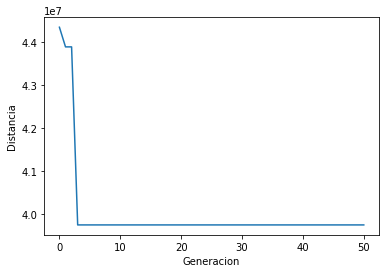

In [38]:
plotGeneticAlgorithm(progress)